In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler

In [2]:
gold_price = pd.read_csv('gld_price_data.csv')

In [3]:
gold_price.head(5) 

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gold_price.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
gold_price.shape

(2290, 6)

In [6]:
gold_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
#checking the number of missing vaue 
gold_price.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
gold_price.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


# Correlation :

#1 Positive Correlation

#2 Negative Correlation

In [9]:
correlation = gold_price.corr()

<AxesSubplot:>

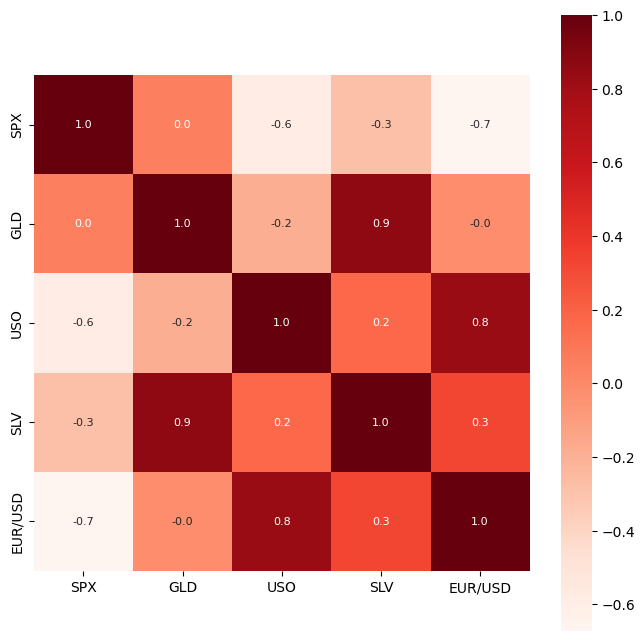

In [10]:
#constructing the heat map to understand the correlation
plt.figure(figsize = (8,8))

sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Reds')

In [11]:
#correlation value for GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\SAURAVKAUSHIK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

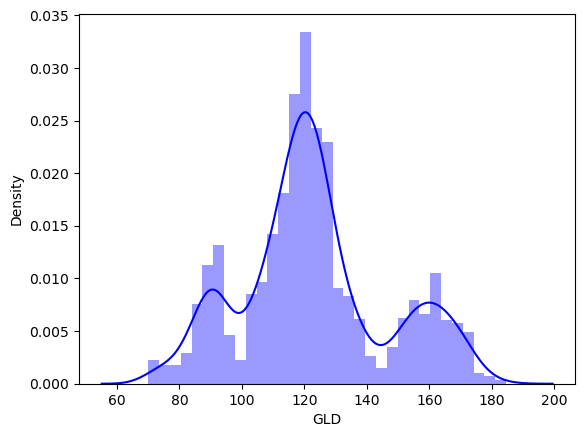

In [12]:
#checking the distributation of GLD price 
sns.distplot(gold_price['GLD'],color = 'blue')

# Splitting the features and Target

In [13]:
x = gold_price.drop(['Date','GLD'],axis = 1)
y = gold_price['GLD']

In [14]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


# splliting into trainign and test data 

In [15]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 2)

# model training

In [16]:
regresser = RandomForestRegressor(n_estimators = 100)

In [17]:
#training the model
regresser.fit(x_train,y_train)

RandomForestRegressor()

In [18]:
#model evaluation
test_data_predection = regresser.predict(x_test)

In [19]:
print(test_data_predection)

[168.51799931  82.34919985 115.98759976 127.5095007  120.66040143
 154.73139772 150.31009883 126.17870037 117.64299853 126.03760095
 116.71300117 171.96900098 141.25019846 167.62779847 115.00870041
 117.22420029 141.07890291 169.91060022 159.88020333 157.08119979
 155.10980036 125.0541003  176.38230007 157.38390368 125.27680033
  93.75949958  77.74190014 120.72179999 119.14939994 167.47289917
  88.25900037 125.17040048  91.14960103 117.81459987 121.06559902
 136.27780008 115.50390122 115.08280049 146.87499974 107.70610064
 104.06790233  87.42189804 126.54600097 117.8543001  153.13359869
 119.50669972 108.37619987 108.48389839  93.10630008 126.99869818
  74.68630053 113.61169935 121.01330049 111.31239894 118.86069903
 120.62749987 158.59030035 167.91440184 147.01759688  85.91329882
  94.19650021  86.8691988   90.6729007  119.06350078 126.36800062
 127.33429999 169.21340019 122.30399908 117.46779897  98.91220043
 168.83260121 143.39659855 132.08650198 121.07700203 120.97919956
 119.69100

In [20]:
error_score = metrics.r2_score(y_test,test_data_predection)
print('R squared error :',error_score)

R squared error : 0.9893392352385252


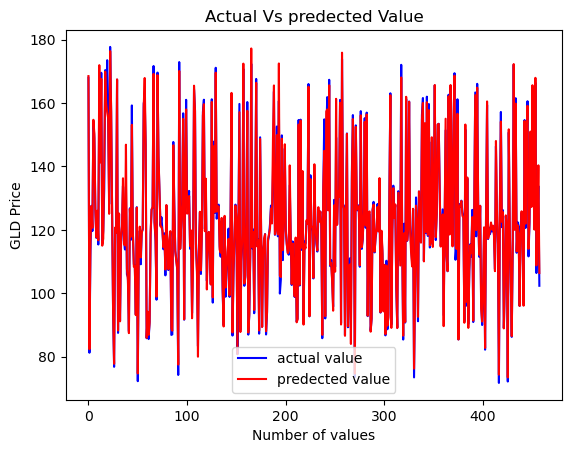

In [21]:
#compare the actual value and predected value in a plot
y_test = list(y_test)
plt.plot(y_test, color = 'blue' , label = 'actual value')
plt.plot(test_data_predection, color = 'red', label = 'predected value')
plt.title('Actual Vs predected Value')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [25]:
input_data = (1447.160034,78.470001,15.18,1.471692)

# change the input_data to numpy array
input_data = np.asarray(input_data)

#reshape the array as we are peedcting for one instance 
input_data_reshaped = input_data.reshape(1,-1)

predection = regresser.predict(input_data_reshaped)

print(predection)

[84.95780028]


C:\Users\SAURAVKAUSHIK\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
